# **Building Vectorizers and Models**

Install dependencies and import libraries

In [ ]:
!pip install pygooglenews

from pygooglenews import GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.2 MB/s 
     |████████████████████████████████| 128 kB 52.5 MB/s 
     |████████████████████████████████| 1.2 MB 45.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44952 sha256=4577486b90f15aed01a421c27eaaad00592b571e8be71e0bb2c1dfaba5f8cf1a
  Stored in directory: /root/.cache/pip/wheels/29/bf/46/b4a597d435d3aee6c2fa583824897336d65abf13ebe3405b70
Successfully built feedparser
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import nltk
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Read Dataset

In [ ]:
df = pd.read_excel("Client_Dataset.xlsx")
df.head(10)

,title,link,title1,Company,NC,Time,Sentiment
0,Tata Metaliks reports Rs 94.72 crore net profi...,https://www.business-standard.com/article/comp...,Tata Metaliks reports Rs 94.72 crore net profi...,Tata Metaliks,NaN,past/current,NaN
1,Tata Metaliks gains 8% after strong June quart...,https://www.livemint.com/market/stock-market-n...,Tata Metaliks gains 8% after strong June quart...,Tata Metaliks,NaN,past/current,p
2,Top stocks to buy with Anil Singhvi: Tata Meta...,https://www.zeebiz.com/market-news/news-top-st...,Top stocks to buy with Anil Singhvi: Tata Meta...,Tata Metaliks,NC,past/current,NaN
3,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",https://economictimes.indiatimes.com/markets/s...,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",Tata Metaliks,NC,past/current,NaN
4,Tata Metaliks: Preferred stock to play the wat...,https://www.moneycontrol.com/news/business/mon...,Tata Metaliks: Preferred stock to play the wat...,Tata Metaliks,NC,past/current,p
5,Tata Metaliks Standalone June 2021 Net Sales a...,https://www.moneycontrol.com/news/business/ear...,Tata Metaliks Standalone June 2021 Net Sales a...,Tata Metaliks,NaN,past/current,NaN
6,"Hot Stocks | Tata Metaliks, Sutlej Textiles ca...",https://www.moneycontrol.com/news/business/mar...,"Hot Stocks | Tata Metaliks, Sutlej Textiles ca...",Tata Metaliks,NC,future,NaN
7,Tata Metaliks among 6 momentum stocks to buy f...,https://economictimes.indiatimes.com/markets/s...,Tata Metaliks among 6 momentum stocks to buy f...,Tata Metaliks,NC,future,NaN
8,"Stocks in news: Maruti Suzuki, Reliance Indust...",https://www.businesstoday.in/markets/company-s...,"Stocks in news: Maruti Suzuki, Reliance Indust...",Tata Metaliks,NC,past/current,NaN
9,There's A Lot To Like About Tata Metaliks' (NS...,https://simplywall.st/stocks/in/materials/nse-...,There's A Lot To Like About Tata Metaliks' (NS...,Tata Metaliks,NC,past/current,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      706 non-null    object
 1   link       706 non-null    object
 2   title1     769 non-null    object
 3   Company    311 non-null    object
 4   NC         273 non-null    object
 5   Time       570 non-null    object
 6   Sentiment  199 non-null    object
dtypes: object(7)
memory usage: 42.2+ KB


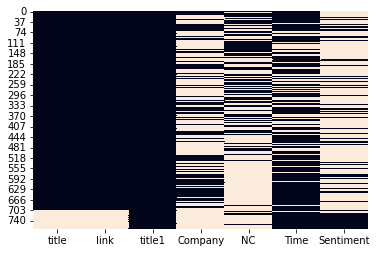

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df = df.drop(["Company", "NC", "title", "link"], axis = 1)

df["Sentiment"].fillna("z", inplace=True)
df["Time"].fillna("Unknown", inplace=True)

df.head(10)

,title1,Time,Sentiment
0,Tata Metaliks reports Rs 94.72 crore net profi...,past/current,z
1,Tata Metaliks gains 8% after strong June quart...,past/current,p
2,Top stocks to buy with Anil Singhvi: Tata Meta...,past/current,z
3,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",past/current,z
4,Tata Metaliks: Preferred stock to play the wat...,past/current,p
5,Tata Metaliks Standalone June 2021 Net Sales a...,past/current,z
6,"Hot Stocks | Tata Metaliks, Sutlej Textiles ca...",future,z
7,Tata Metaliks among 6 momentum stocks to buy f...,future,z
8,"Stocks in news: Maruti Suzuki, Reliance Indust...",past/current,z
9,There's A Lot To Like About Tata Metaliks' (NS...,past/current,z


Data Exploration (Perform EDA)

In [ ]:
eda_df = df[["title1",	"Time",	'Sentiment']]

eda_df["Sentiment"] = LabelEncoder().fit_transform(df["Sentiment"]) 
eda_df["Time"] = LabelEncoder().fit_transform(df["Time"])           

eda_df.head(10)

,title1,Time,Sentiment
0,Tata Metaliks reports Rs 94.72 crore net profi...,2,2
1,Tata Metaliks gains 8% after strong June quart...,2,1
2,Top stocks to buy with Anil Singhvi: Tata Meta...,2,2
3,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",2,2
4,Tata Metaliks: Preferred stock to play the wat...,2,1
5,Tata Metaliks Standalone June 2021 Net Sales a...,2,2
6,"Hot Stocks | Tata Metaliks, Sutlej Textiles ca...",1,2
7,Tata Metaliks among 6 momentum stocks to buy f...,1,2
8,"Stocks in news: Maruti Suzuki, Reliance Indust...",2,2
9,There's A Lot To Like About Tata Metaliks' (NS...,2,2


In [ ]:
eda_df.shape

(769, 3)

In [ ]:
eda_df.isnull().sum()

title1       0
Time         0
Sentiment    0
dtype: int64

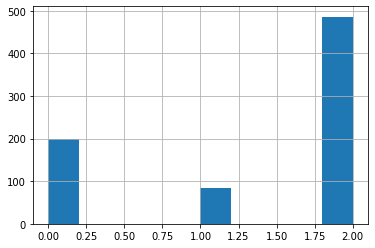

In [ ]:
eda_df['Time'].hist() # Unknown:0,future:1,past/current:2

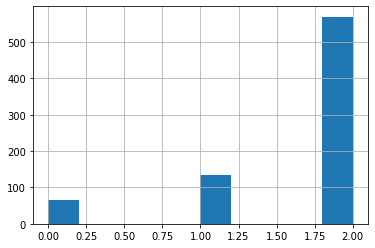

In [ ]:
eda_df['Sentiment'].hist() # n:0,p:1,z:2

Data Clean-up for NLP Sentiment Analysis

In [ ]:
df = df.drop(["Time"], axis = 1)
df

,title1,Sentiment
0,Tata Metaliks reports Rs 94.72 crore net profi...,z
1,Tata Metaliks gains 8% after strong June quart...,p
2,Top stocks to buy with Anil Singhvi: Tata Meta...,z
3,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",z
4,Tata Metaliks: Preferred stock to play the wat...,p
...,...,...
764,Tata Steel deploys first biofuel-powered ship ...,p
765,Tata Steel interested in acquiring Vizag-based...,p
766,Inside Tata Steel's Digital Transformation,p
767,Board of Tata Steel approves allotment of 1.82...,p


In [ ]:
def cleanup(news_titles):
  # all news headlines to lower case
  news_titles = news_titles.apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # remove non-alpha characters
  news_titles = news_titles.apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

  # remove stop words
  news_titles = news_titles.apply(lambda x: " ".join([x for x in x.split() if x not in stopwords.words('english')]))

  # perform lemmatization
  news_titles = news_titles.apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(w) for w in nltk.word_tokenize(x)]))

  return news_titles

In [ ]:
df["r_title"] = cleanup(df["title1"])
df

,title1,Sentiment,r_title
0,Tata Metaliks reports Rs 94.72 crore net profi...,z,tata metaliks report r crore net profit june q...
1,Tata Metaliks gains 8% after strong June quart...,p,tata metaliks gain strong june quarter perform...
2,Top stocks to buy with Anil Singhvi: Tata Meta...,z,top stock buy anil singhvi tata metaliks ltd s...
3,"Stocks in focus: Tata Metaliks, Zuari Agro Che...",z,stock focus tata metaliks zuari agro chem
4,Tata Metaliks: Preferred stock to play the wat...,p,tata metaliks preferred stock play water infra...
...,...,...,...
764,Tata Steel deploys first biofuel-powered ship ...,p,tata steel deploys first biofuelpowered ship i...
765,Tata Steel interested in acquiring Vizag-based...,p,tata steel interested acquiring vizagbased rin...
766,Inside Tata Steel's Digital Transformation,p,inside tata steel digital transformation
767,Board of Tata Steel approves allotment of 1.82...,p,board tata steel approves allotment cr equity ...


In [ ]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(df['r_title'], df['Sentiment'], test_size=0.25, random_state=30, stratify = df["Sentiment"])
print("Train: ", X_train.shape, y_train.shape, "Test: ", (X_test.shape, y_test.shape))

Train:  (576,) (576,) Test:  ((193,), (193,))


Count Vectorizer

In [ ]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train, y_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
# saving vectorizer as pickle dump
pickle.dump(count_vectorizer, open("c_vectorizer.pkl",'wb'))

Hyperparameter Tuning via GridSearch

In [ ]:
# SVM

svm = SVC()
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'degree' :[2, 3, 4, 5, 6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(svm, param_grid, n_jobs=-1, cv=cv, refit=True, verbose=2,error_score=0)
best_model_c = grid.fit(count_train, y_train)

Fitting 30 folds for each of 125 candidates, totalling 3750 fits


In [ ]:
# fitting the model for grid search
print(best_model_c.best_score_, best_model_c.best_params_)

0.8119681387376487 {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


Training and Testing Accuracy - by SVM (an ML Classifier)

In [ ]:
svm = SVC(C = 100, degree = 2, gamma=0.001, kernel= 'rbf')
svm.fit(count_train,y_train)
y_test_pred_c = svm.predict(count_test)
svm_acc = accuracy_score(y_test, y_test_pred_c)
print("SVM: ", svm_acc)

SVM:  0.8549222797927462


In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


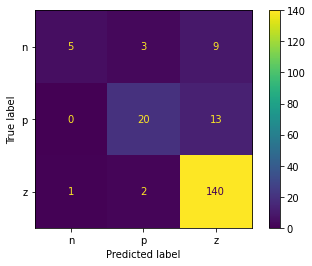

In [ ]:
grid_predictions = grid.predict(count_test)
plot_confusion_matrix(svm, count_test, y_test)

Saving the model as pickle dump

In [ ]:
filename = 'sentiment-model_count.pkl'
pickle.dump(svm, open(filename, 'wb'))

Tf-Idf Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

tf_x_train = tfidf_vectorizer.fit_transform(X_train)
tf_x_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# saving vectorizer as pickle dump

pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl",'wb'))

Hyperparameter Tuning via GridSearch

In [ ]:
# SVM
    
clf = SVC()
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'degree' :[2, 3, 4, 5, 6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(clf,param_grid,n_jobs=-1,cv=cv,refit=True,verbose=2,error_score=0)

# fitting the model for grid search
best_model_t = grid.fit(tf_x_train, y_train)

Fitting 30 folds for each of 125 candidates, totalling 3750 fits


In [ ]:
print(best_model_t.best_score_, best_model_t.best_params_)

0.7963299052228271 {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
clf = SVC(C=10, degree= 2, gamma= 0.1, kernel= 'rbf')
clf.fit(tf_x_train, y_train)

y_test_pred_t = clf.predict(tf_x_test)
svm_acc_t = accuracy_score(y_test, y_test_pred_t)
print("SVM: ", svm_acc_t)

SVM:  0.8186528497409327


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


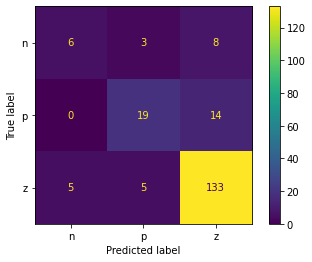

In [ ]:
grid_predictions = grid.predict(tf_x_test)
plot_confusion_matrix(clf, tf_x_test, y_test)

Saving the model as pickle dump

In [ ]:
filename = 'sentiment-model_tfidf.pkl'
pickle.dump(clf, open(filename, 'wb'))

Word2Vec Vectorizer

In [ ]:
# Word Embedding

df["token_title"] = [nltk.word_tokenize(k) for k in df["r_title"].to_list()]
word2vec_tr = Word2Vec(df["token_title"], min_count=1, window=3)
print(word2vec_tr)

Word2Vec(vocab=2121, size=100, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


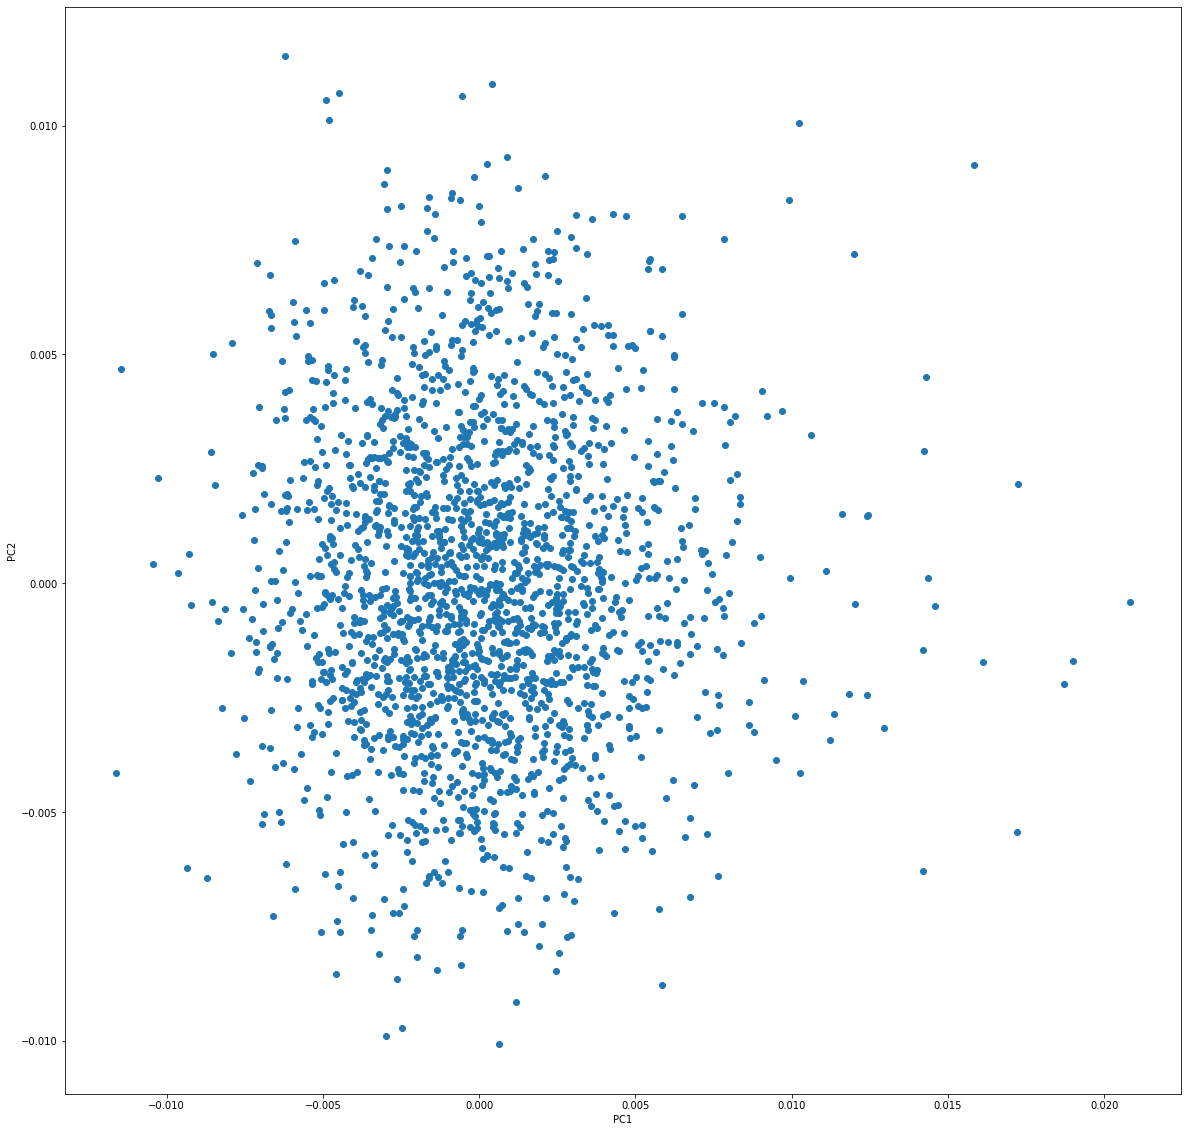

In [ ]:
words = word2vec_tr.wv.vocab

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(word2vec_tr[words])

# create a scatter plot of the projection
pyplot.figure(figsize=(20,20))
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.xlabel("PC1",size=10)
pyplot.ylabel("PC2",size=10)
pyplot.show()

Saving vectorizer as pickle dump

In [ ]:
pickle.dump(word2vec_tr, open("w2v_vectorizer.pkl",'wb'))

Vectorize the vocabulary of the w2v Model

In [ ]:
def W2Vvectorize(tokenized_train, w2vmodel):
    vector=[]
    words = list(w2vmodel.wv.vocab.keys())
    for sent in tokenized_train:
        sent_vec=np.zeros(100)
        count = 0
        for word in sent:
            if word in words:
                vec = w2vmodel.wv[word]
                sent_vec += vec 
                count += 1
        if count != 0:
            sent_vec /= count #normalizing
        vector.append(sent_vec)
    return vector

In [ ]:
# Train-Test Split

X_train, X_test, Y_train, Y_test = train_test_split(df["token_title"], df["Sentiment"], test_size=0.2, stratify = df["Sentiment"])
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape, Y_test.shape))

Train:  (615,) (615,) Test:  ((154,), (154,))


Vectorize the training and test datasets

In [ ]:
train_tf_w2v = W2Vvectorize(X_train, word2vec_tr)
test_tf_w2v = W2Vvectorize(X_test, word2vec_tr)

Hyperparameter Tuning via GridSearch and K-fold Cross Validation

In [ ]:
# SVM

mdl = SVC()
mdl.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'degree' :[2, 3, 4, 5, 6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
# Define grid search

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(mdl, param_grid, n_jobs=-1, cv=cv, scoring='accuracy', refit=True, verbose=2, error_score=0)

# fitting the model for grid search
best_model_w = grid.fit(train_tf_w2v, Y_train)

Fitting 30 folds for each of 125 candidates, totalling 3750 fits


In [ ]:
print(best_model_w.best_score_, best_model_w.best_params_)

0.7452670544685351 {'C': 1000, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
mdl = SVC(C=1000, degree=2, gamma=1, kernel='rbf')
mdl.fit(train_tf_w2v, Y_train)

y_test_pred_w = mdl.predict(test_tf_w2v)
svm_acc_w = accuracy_score(Y_test, y_test_pred_w)
print("SVM: ", svm_acc_w)

SVM:  0.7467532467532467


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


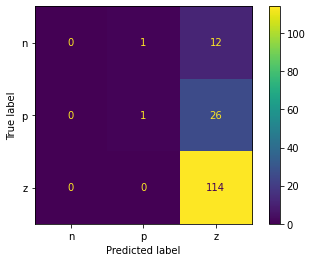

In [ ]:
grid_predictions = grid.predict(test_tf_w2v)
plot_confusion_matrix(mdl, test_tf_w2v, Y_test)

Saving the model as pickle dump

In [ ]:
# save the model 
pickle.dump(mdl, open("sentiment-model_w2v.pkl",'wb'))

# **Testing on Scrapped Dataset**

Extracting Web-Scrapped Dataset

In [ ]:
#list of keywords
keyword_list = [ 'HERO MOTOCORP LTD.', 'Srikalahasthi Pipes Limited', 'FORCE MOTORS LTD.', 'HINDUSTAN CONSTRUCTION CO.LTD.',
                'ABB India Limited', 'KINETIC ENGINEERING LTD', 'USHA MARTIN LTD.', 'MAHINDRA & MAHINDRA LTD.',
                'MAHARASHTRA SEAMLESS LTD.', 'BHARAT HEAVY ELECTRICALS LTD.', 'LML LTD.', 'ELECTROTHERM (INDIA) LTD.',
                'MARUTI SUZUKI INDIA LTD.', 'NCC Limited', 'THERMAX LTD.', 'MAJESTIC AUTO LTD.', 'MSP STEEL & POWER LTD.',
                'BEML LTD.', 'JINDAL SAW LTD.', 'ATLAS CYCLES (HARYANA) LTD.']

In [ ]:
# function to scrape news and then clean it, returns a list

def get_news(word):
    gn = GoogleNews(country = 'IN')
    ksearch = gn.search(word)
    entry = ksearch['entries']
    tlist = []
    for i in entry:
        tlist.append(i['title'])
    
    tfinal = []
    for ele in tlist:
        if '-' in ele:
            temp_list = re.split(' - ', ele)
        else:
            temp_list = re.split(' [|] *', ele)
        tfinal.append(temp_list[0])

    return tfinal

In [ ]:
# create a dataframe for each list and append it to a final dataframe

def get_dataframe():
    final_df = pd.DataFrame()
    
    for kw in keyword_list:
        nlist = get_news(kw)
        cname = [kw for i in range(len(nlist))]
        df = pd.DataFrame(list(zip(cname, nlist[0:42])), columns=['company_name', 'news'])
        final_df = final_df.append(df, ignore_index=True)
        
    #final_df.reset_index(drop=True)
    return final_df

In [ ]:
news_df = get_dataframe()
news_df.sample(frac=0.1)

,company_name,news
312,MAHINDRA & MAHINDRA LTD.,"Tillage Equipment Market Size, Scope and Forec..."
550,NCC Limited,We Think That There Are Issues Underlying NCC'...
359,BHARAT HEAVY ELECTRICALS LTD.,"BHEl, LIC played key role in country’s develop..."
722,JINDAL SAW LTD.,"Seamless Pipes Market Business Growth Tactics,..."
170,ABB India Limited,IoT at Workplace Market 2022 by Keyplayers and...
...,...,...
226,KINETIC ENGINEERING LTD,ICRA upgrades rating of H G Infra Engineering Ltd
123,HINDUSTAN CONSTRUCTION CO.LTD.,Top 10 Best Indian Construction Companies In 2022
93,FORCE MOTORS LTD.,Medium & Low Voltage Motors Market Rising Dema...
533,NCC Limited,"Buy NCC, target price Rs 108: HDFC Securities"


Preprocessing and clean-up of the scrapped Dataset

In [ ]:
news_df["r_title"] = cleanup(news_df["news"])
news_df

,company_name,news,r_title
0,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 2825: HDFC ...",buy hero motocorp target price r hdfc security
1,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 3069: HDFC ...",buy hero motocorp target price r hdfc security
2,HERO MOTOCORP LTD.,Hero Moto Corp postpones EV launch,hero moto corp postpones ev launch
3,HERO MOTOCORP LTD.,Hero MotoCorp strengthens partnership with Utt...,hero motocorp strengthens partnership uttarakh...
4,HERO MOTOCORP LTD.,Hero MotoCorp expects two-wheeler industry to ...,hero motocorp expects twowheeler industry see ...
...,...,...,...
758,ATLAS CYCLES (HARYANA) LTD.,"Blog: On World Bicycle Day, Atlas Cycles rides...",blog world bicycle day atlas cycle ride sunset...
759,ATLAS CYCLES (HARYANA) LTD.,Atlas Products restrained from using 'Atlas' a...,atlas product restrained using atlas trade name
760,ATLAS CYCLES (HARYANA) LTD.,Former Atlas Cycles president held in cheating...,former atlas cycle president held cheating case
761,ATLAS CYCLES (HARYANA) LTD.,Delhi: Wife of top cycle firm executive hangs ...,delhi wife top cycle firm executive hang


Load the Vectorizers and the Models

Count Vectorizer

In [ ]:
# load the count sentiment vectorizer from the file
c_vectorizer = pickle.load(open("c_vectorizer.pkl", 'rb'))
c_x_test = c_vectorizer.transform(news_df['r_title']).toarray()

# loading saved sentimental model to test on extracted data
filename = 'sentiment-model_count.pkl'
c_sentiment_model = pickle.load(open(filename, 'rb'))

# prediction on the scrapped dataset
result_sentiment_c = c_sentiment_model.predict(c_x_test)
news_df["Sentiment_Count"] = result_sentiment_c

In [ ]:
news_df

,company_name,news,r_title,Sentiment_Count
0,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 2825: HDFC ...",buy hero motocorp target price r hdfc security,z
1,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 3069: HDFC ...",buy hero motocorp target price r hdfc security,z
2,HERO MOTOCORP LTD.,Hero Moto Corp postpones EV launch,hero moto corp postpones ev launch,z
3,HERO MOTOCORP LTD.,Hero MotoCorp strengthens partnership with Utt...,hero motocorp strengthens partnership uttarakh...,z
4,HERO MOTOCORP LTD.,Hero MotoCorp expects two-wheeler industry to ...,hero motocorp expects twowheeler industry see ...,z
...,...,...,...,...
758,ATLAS CYCLES (HARYANA) LTD.,"Blog: On World Bicycle Day, Atlas Cycles rides...",blog world bicycle day atlas cycle ride sunset...,z
759,ATLAS CYCLES (HARYANA) LTD.,Atlas Products restrained from using 'Atlas' a...,atlas product restrained using atlas trade name,z
760,ATLAS CYCLES (HARYANA) LTD.,Former Atlas Cycles president held in cheating...,former atlas cycle president held cheating case,z
761,ATLAS CYCLES (HARYANA) LTD.,Delhi: Wife of top cycle firm executive hangs ...,delhi wife top cycle firm executive hang,z


Tf-Idf Vectorizer

In [ ]:
# load the tf-idf sentiment vectorizer from the file
tfidf_vectorizer = pickle.load(open("tfidf_vectorizer.pkl", 'rb'))
tf_x_test = tfidf_vectorizer.transform(news_df['r_title']).toarray()

# loading saved sentimental model to test on extracted data
filename = 'sentiment-model_tfidf.pkl'
tfidf_sentiment_model = pickle.load(open(filename, 'rb'))

# prediction on the scrapped dataset
result_sentiment_tfidf = tfidf_sentiment_model.predict(tf_x_test)
news_df["Sentiment_TfIdf"] = result_sentiment_tfidf

In [ ]:
news_df

,company_name,news,r_title,Sentiment_Count,Sentiment_TfIdf
0,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 2825: HDFC ...",buy hero motocorp target price r hdfc security,z,z
1,HERO MOTOCORP LTD.,"Buy Hero MotoCorp, target price Rs 3069: HDFC ...",buy hero motocorp target price r hdfc security,z,z
2,HERO MOTOCORP LTD.,Hero Moto Corp postpones EV launch,hero moto corp postpones ev launch,z,z
3,HERO MOTOCORP LTD.,Hero MotoCorp strengthens partnership with Utt...,hero motocorp strengthens partnership uttarakh...,z,z
4,HERO MOTOCORP LTD.,Hero MotoCorp expects two-wheeler industry to ...,hero motocorp expects twowheeler industry see ...,z,z
...,...,...,...,...,...
758,ATLAS CYCLES (HARYANA) LTD.,"Blog: On World Bicycle Day, Atlas Cycles rides...",blog world bicycle day atlas cycle ride sunset...,z,z
759,ATLAS CYCLES (HARYANA) LTD.,Atlas Products restrained from using 'Atlas' a...,atlas product restrained using atlas trade name,z,z
760,ATLAS CYCLES (HARYANA) LTD.,Former Atlas Cycles president held in cheating...,former atlas cycle president held cheating case,z,z
761,ATLAS CYCLES (HARYANA) LTD.,Delhi: Wife of top cycle firm executive hangs ...,delhi wife top cycle firm executive hang,z,z


Word2Vec Vectorizer

In [ ]:
# load the w2v sentiment vectorizer from the file
w2v_vectorizer = pickle.load(open("w2v_vectorizer.pkl", 'rb'))
w2v_x_test = [nltk.word_tokenize(k) for k in news_df['r_title'].to_list()]

# loading saved sentimental model to test on extracted data
filename = 'sentiment-model_w2v.pkl'
w2v_sentiment_model = pickle.load(open(filename, 'rb'))

# prediction on the scrapped dataset
result_sentiment_w2v = w2v_sentiment_model.predict(W2Vvectorize(w2v_x_test, w2v_vectorizer))
news_df["Sentiment_W2V"] = result_sentiment_w2v

In [ ]:
news_df.sample(frac=0.1)

,company_name,news,r_title,Sentiment_Count,Sentiment_TfIdf,Sentiment_W2V
412,LML LTD.,"After Hours: Yogesh Bhatia, CEO, LML",hour yogesh bhatia ceo lml,z,z,z
158,ABB India Limited,Asset Reliability Management Market Upcoming T...,asset reliability management market upcoming t...,z,z,z
114,HINDUSTAN CONSTRUCTION CO.LTD.,HCC hit lower circuit after a flop show in Q4,hcc hit lower circuit flop show q,z,z,z
676,BEML LTD.,'Large part of year ahead for divestment': DIP...,large part year ahead divestment dipam joint s...,z,z,z
749,ATLAS CYCLES (HARYANA) LTD.,Atlas Cycles closes operations at last manufac...,atlas cycle close operation last manufacturing...,z,z,z
...,...,...,...,...,...,...
622,MSP STEEL & POWER LTD.,Should We Be Cautious About MSP Steel & Power ...,cautious msp steel power limited nse mspl roe,z,z,p
11,HERO MOTOCORP LTD.,The road to a meaningful recovery for two-whee...,road meaningful recovery twowheelers long mint,z,z,z
91,FORCE MOTORS LTD.,"Rolls-Royce India President, Kishore Jayaraman...",rollsroyce india president kishore jayaraman r...,z,z,z
183,ABB India Limited,Manufacturing Operations Management (MOM) Soft...,manufacturing operation management mom softwar...,z,z,z


In [ ]:
news_df["Sentiment_W2V"].unique()

array(['z', 'p'], dtype=object)

In [ ]:
news_df["Sentiment_Count"].unique()

array(['z', 'p', 'n'], dtype=object)

In [ ]:
news_df["Sentiment_TfIdf"].unique()

array(['z', 'p', 'n'], dtype=object)

Extract resultant dataframe to .csv

In [ ]:
news_df.to_csv('sentiment-results.csv')